The codes here solves the **Lotka-Volterra equations** using the Python odeint module.

The Lotka-Volterra equations are

$ \frac{dx}{dt} = a\,x -b\,x\,y\,,\quad \frac{dy}{dt} = -c\,y + d\,x\,y\,,$

where $x(t)$ denotes the prey population as a function of time $t$, and $(t)$ denotes the predator population.  The populations are taken to be **normalized** (i.e. having values in the range $[0,1]$).  

1. $a$, $b$, $c$ and $d$ are the **positive** system parameters. 

    * $a$ is the growth rate of the prey in the absence of the predators; a larger value leads to faster growth
    * $b$ is the prey death rate due to predation; 
    * $c$ is the predator death rate when no prey is around; a larger value leads to faster extinction
    * $d$ is the "predation success" rate that could bring about growth in the predator population. 

_Usually these values are estimated by comparing the solutions to the observational data.  We are however more interested in the qualitative behavior of the system._

2. To solve these equations, we also need to specify the _initial conditions_, $(x_0, y_0)$, the populations at $t=0$.

_This is less uncertain: you can make an observation of the populations, and start the clock.  When we do computational simulations, however, we will have to simply make specifications - and sometimes the values specified may not make sense, i.e. the resulting solution may not be realistic._

3. This is also the reason why working with normalized populations has the advantage: we can actually tell whether our computed solutions are realistic or not.

This set of equations can be cast in the following form:

$\frac{dz}{dt} = G(z)\,,$

with $z(t) = [x(t), y(t)]$, i.e. in Python terms, $z[0]$ is $x$ and $z[1]$ is $y$,
subject to the initial conditions $z(0) = [x(0), y(0)]$, and

$G(z) = [\,\, a*z[0] - b*z[0]*z[1], \,\,-c*z[1] + d*z[0]*z[1] \,\,]\,.$


First we import the required modules for the computation and plotting.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

Next we define the $G$ function above, and call it LV.

In [2]:
# Lotka-Volterra
def LV(z, t):
    # Here z is a vector such that x=z[0] and y=z[1]. 
    # This function should return [dx/dt, dy/dt]
    return [ a*z[0] - b*z[0]*z[1], - c*z[1] + d*z[0]*z[1] ]

Given the Lotka-Volterra equations, we need to specify

- how long (tmax) we would like to integrate to (i.e. the time duration we want the solutions for), and the specific tiime points at which we would like to have the solutions (population numbers).
- the system parameters $a$, $b$, $c$ and $d$. 

The exploration is to determine the qualitative behavior of the populations in time, and some feeling of the range of the parameter values.

This is set up in the next cell.

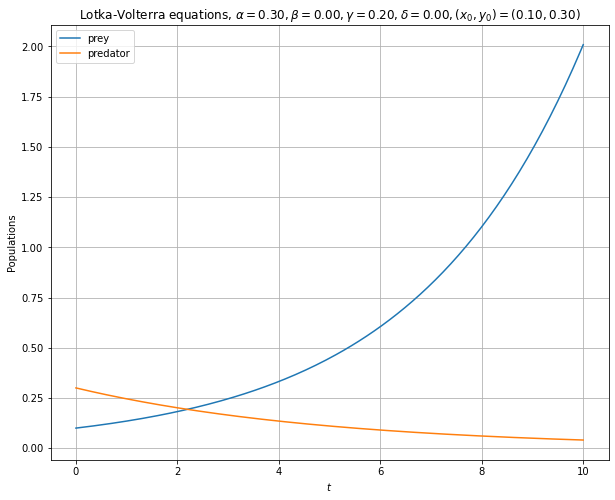

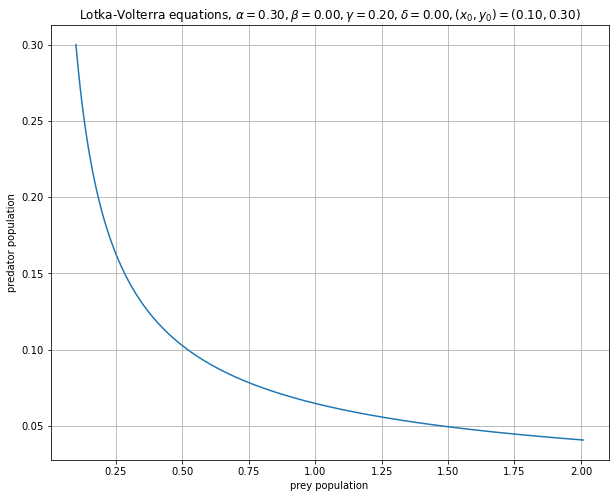

In [3]:
tmax = 10  # for a short time to begin with
ticks = 20*tmax  # the total number of time points we want solutions at.
# We then initialize a time array with values at these time points.
ts = np.linspace(0, tmax, ticks)

# Next the system parameters.
# Case with no interaction between the two populations.
a=0.3
b=0.0 
c=0.2
d=0.0

# Now the initial conditions.
x0=0.1
y0=0.3
z0 = [x0, y0]

# We then call the odeint module to generate a numerical solution
zs = odeint(LV, z0, ts)

# Now zs is an array of length **ticks** (corresponding to the values of **ts*).

# Plotting to visualize the solutions
plt.figure(figsize=(10,8))
# the line above specifies the figure size.  You can vary the numbers to get a plot size you like.

plt.xlabel(r"$t$")  # this gives a label to the x-axis - the r before the quotes is needed if you want to use
# mathematical expressions (i.e. placed between $ signs)

plt.ylabel("Populations")  # this labels the y-axis

# Now plotting, and specifying the parameter values, 2 decimal points (.2) in floating number (f) format
plt.title(r"Lotka-Volterra equations, $\alpha=%.2f, \beta=%.2f, \gamma=%.2f, \delta=%.2f, (x_0,y_0)=(%.2f,%.2f)$" 
          % (a, b, c, d, x0, y0))

plt.plot(ts, zs[:,0], label='prey')  # first plot the prey population and attach a label
plt.plot(ts, zs[:,1], label='predator')  # next plot the predator population and attach a label
plt.legend(loc='upper left')  # decides where to put the legend of labels
plt.grid()  # turn on grid on the plot
plt.show()

# We have learnt from the discrete time predator-predator system that if the populations go through cycles, 
# i.e. repeat patterns, we will see a closed loop in the prey vs predator plot.
plt.figure(figsize=(10,8))
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title(r"Lotka-Volterra equations, $\alpha=%.2f, \beta=%.2f, \gamma=%.2f, \delta=%.2f, (x_0,y_0)=(%.2f,%.2f)$" 
          % (a, b, c, d, x0, y0))
plt.plot(zs[:,0], zs[:,1])
plt.grid()
plt.show()


The computation above corresponds to the case where there is no interaction between the two populations ($b=d=0$).  The exponential growth and decline of the populations provide verification of what we expected. 

Next we put back the interactions, and lengthen the integration time tmax.

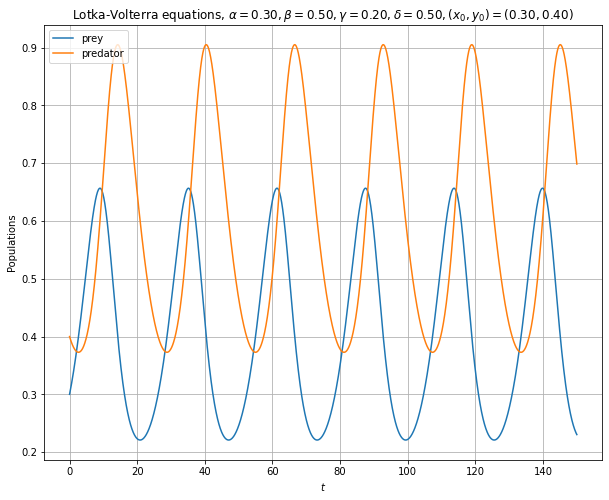

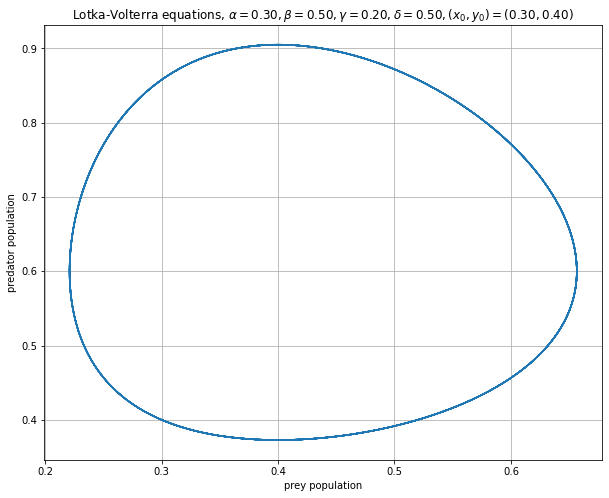

In [4]:
# longer time integration
tmax = 150
ticks = 20*tmax

ts = np.linspace(0, tmax, ticks)  # reset the longer time point sequence

# Same system parameter values
a=0.3
b=0.5
c=0.2
d=0.5

# slightly different initial populations
x0=0.3
y0=0.4
z0 = [x0, y0]

zs = odeint(LV, z0, ts)
prey = zs[:,0]
predator = zs[:,1]
plt.figure(figsize=(10,8))
plt.xlabel(r"$t$")
plt.ylabel("Populations")
plt.title(r"Lotka-Volterra equations, $\alpha=%.2f, \beta=%.2f, \gamma=%.2f, \delta=%.2f, (x_0,y_0)=(%.2f,%.2f)$" 
          % (a, b, c, d, x0, y0))

plt.plot(ts, prey, label='prey')
plt.plot(ts, predator, label='predator')
plt.legend(loc='upper left')
plt.grid()
plt.show()

plt.figure(figsize=(10,8))
plt.xlabel("prey population")
plt.ylabel("predator population")
plt.title(r"Lotka-Volterra equations, $\alpha=%.2f, \beta=%.2f, \gamma=%.2f, \delta=%.2f, (x_0,y_0)=(%.2f,%.2f)$" 
          % (a, b, c, d, x0, y0))
plt.plot(prey, predator)
plt.grid()
plt.show()

Some lessons:

- the solutions are periodic, i.e. cyclic or repeating behaviors of the populations, as verified by the closed loop in the second plot.
- the prey population is (0.3) when we first start.  With a declining predator population, the prey population grows.  
- as the prey population increases, food becomes more plentiful for the predators, so they end their decline and start to grow too.
- with a growing predator population, the prey suffers and their population eventuall starts to decline, until it is too low to sustain the predator population.  
- the scenario repeats.

The initial populations and system parameter values can make differences to the solutions.  

You can make bigger variations, and find out if there are more drastic or surprising differences.

In the following cells, we try to solve the Lotka-Volterra equations using different initial populations.  For convenience, we explore $(x_0, y_0) = (0.1, 0.1), (0.2, 0.2), ..., (0.9, 0.9)$.  

There are more compact ways to code this, but we do it the brute-force way here.

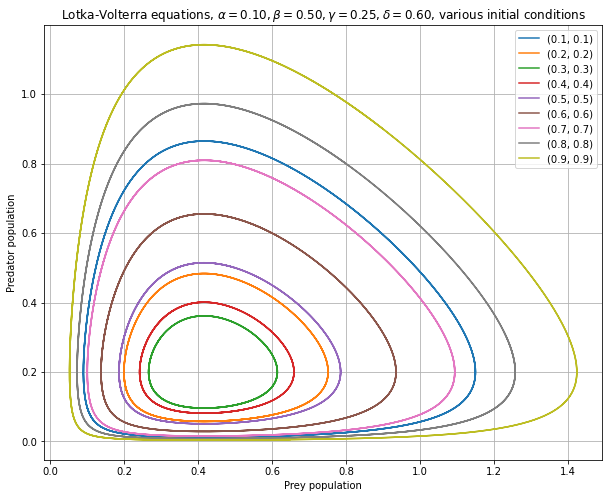

In [5]:
a=0.1
b=0.5
c=0.25
d=0.6

z0 = [0.1, 0.1]
zs = odeint(LV, z0, ts)
plt.figure(figsize=(10,8))
plt.plot(zs[:,0], zs[:,1], label="(0.1, 0.1)")

z0 = [0.2, 0.2]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.2, 0.2)")

z0 = [0.3, 0.3]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.3, 0.3)")

z0 = [0.4, 0.4]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.4, 0.4)")

z0 = [0.5, 0.5]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.5, 0.5)")

z0 = [0.6, 0.6]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.6, 0.6)")

z0 = [0.7, 0.7]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.7, 0.7)")

z0 = [0.8, 0.8]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.8, 0.8)")

z0 = [0.9, 0.9]
zs = odeint(LV, z0, ts)
plt.plot(zs[:,0], zs[:,1], label="(0.9, 0.9)")

plt.xlabel("Prey population")
plt.ylabel("Predator population")
plt.title(r"Lotka-Volterra equations, $\alpha=%.2f, \beta=%.2f, \gamma=%.2f, \delta=%.2f$, various initial conditions"
         % (a, b, c, d))
plt.grid()
plt.legend(loc="upper right")
plt.show()